### Project Overview 
- Covid-19 has left the country and many other parts of the world at stand still. With the unemploament rate at a an all time high people are left wondering what the new norm will be. You have been provided an api that will keep the country up to date on te Covid-19 Spread. Use this Api to analize the virus impact as well as the global groth on a daily basis.

- Observe whisch States re taking more of an impact
- Take a look into the Deaths, Survived cases
- Imcoporate Deep Learning forecasting the next month projections for COVID-19

In [9]:
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import json

In [2]:
r = requests.get("https://disease.sh/v2/nyt/states")

In [16]:
covid_json = json.loads(r.text)

In [24]:
covid_data = pd.DataFrame(covid_json)

In [26]:
covid_data["date"] = pd.to_datetime(covid_data["date"])

In [30]:
covid_data.set_index("date", inplace = True)

In [31]:
covid_data

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
...,...,...,...,...
2020-05-28,Virginia,51,41401,1338
2020-05-28,Washington,53,21825,1116
2020-05-28,West Virginia,54,1986,74


## Visualizations
- We will take a look at Covid impact by state
- WE will group the data by state and get the sum (to date) cases and deaths

In [37]:
by_state_sum = covid_data.groupby("state").sum()

### Confirmed Cases
- New York Leads all states with a totol case count of 16Million

In [40]:
covid_data.groupby("state").sum().loc["New York"]

cases     16519460
deaths     1198350
Name: New York, dtype: int64

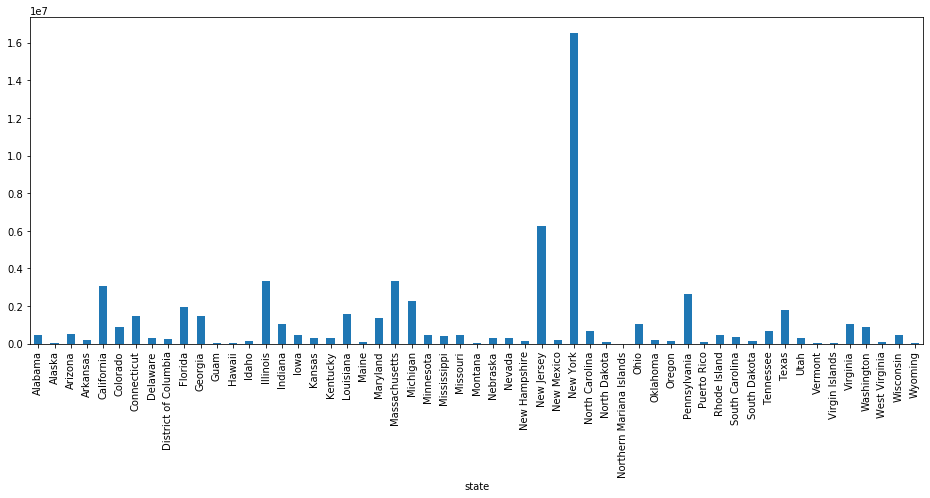

In [38]:
by_state_sum["cases"].plot(kind = "bar", figsize = (16,6))

### Deaths
- Total Deaths by state to date
- New York also leads in deaths with a count of 1.2M to date
- Expected coorelation to confiremd to deaths 
- Will look at this in a scatter plot below

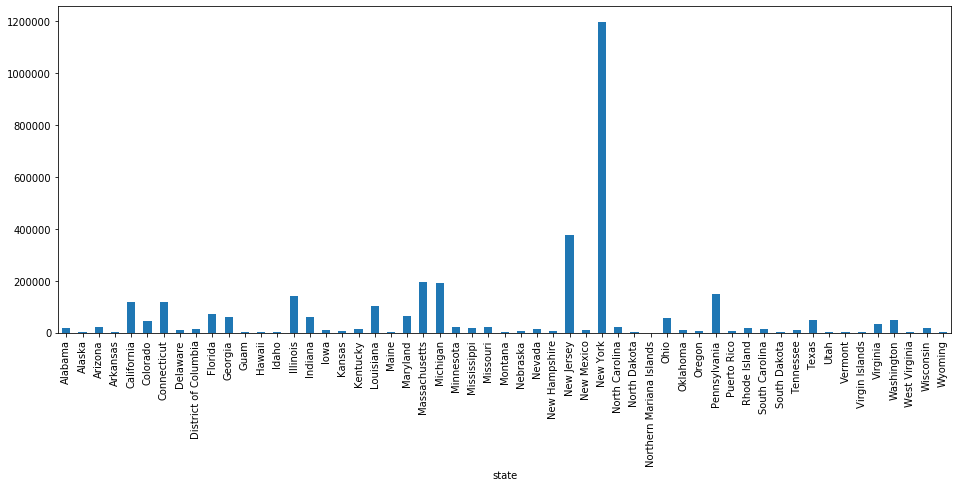

In [44]:
by_state_sum["deaths"].plot(kind = "bar", figsize = (16,6))

### Cases to death coorelation 
- We can see a sring coorelation between Deaths and Cases

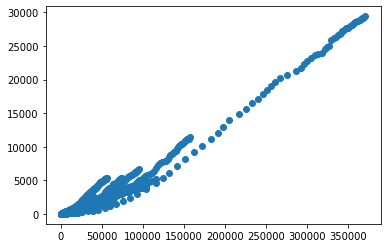

In [54]:
plt.scatter(x = covid_data["cases"], y = covid_data["deaths"])

### Daily cases per state
- Will use pivot table to get a better structure for the the data to analyze
- We will take a deeper in to the daily growth for New York 
- Appears that confirmed cases are stil gping up by the day for New York
- WE will take a look at the daily canges for newyork

In [62]:
by_State_Daily = covid_data.pivot_table(columns="state", index="date", values="cases")

(18322, 18413)

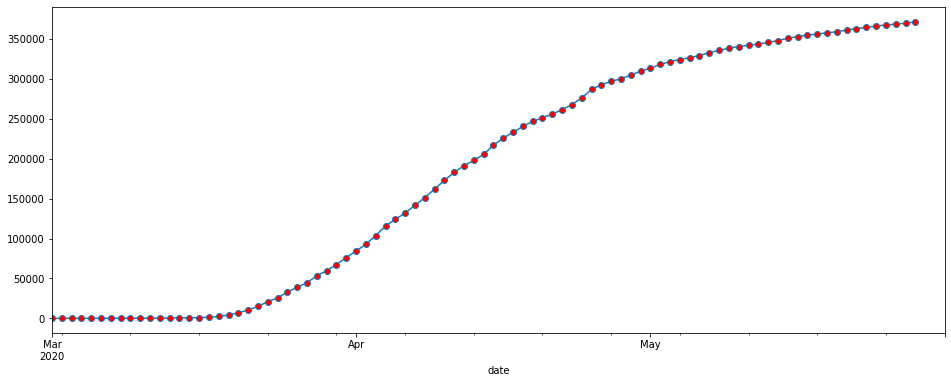

In [85]:
ax = by_State_Daily["New York"].plot(figsize = (16,6), marker = "o", mfc = "r")
plt.xlim("2020-3-1", "2020-5-31")

## Flattening the Curve
- Below we can see that there are no huge spikes in dail confirmed cases so the curve has flattened


(18322, 18413)

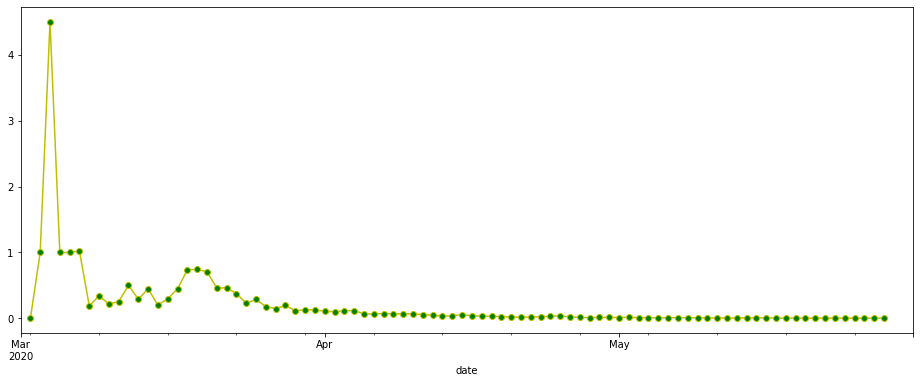

In [82]:
by_State_Daily["New York"].pct_change().plot(figsize = (16,6), marker = "o", c ="y", mfc = "g")
plt.xlim("2020-3-1", "2020-5-31")

In [90]:
import plotly.figure_factory as ff 

In [95]:
ff.create_choropleth(covid_data["fips"], values=covid_data["cases"])

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo
